# Data Visualiztion for Box Office Data

Starting from early film criticism, first being printed at the beginning of the 20th century by journalists to the new digital age of twitter reactions to a highly anticipated blockbuster, the sheer volume and different types of data that can be retrieved from films has seen rapid growth throughout the years. However, to most Hollywood executives and studios perhaps the first metric used to measure the success of a film remains the most crucial, box office sales.

From the dataset, I stitched together from the various sources and the powerful graphical and visualization tools provided by this notebook, I will display the trends and shifts that are apparent in the last 50 years of box office data. These will help gain a deeper understanding of the box office data beyond their numerical values.

First let us take a closer look at the data available to us.

In [9]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45464 entries, 0 to 45463
Data columns (total 21 columns):
imdbID                   43442 non-null object
Title                    45442 non-null object
Year                     45442 non-null object
Rated                    31980 non-null object
Budget                   3014 non-null float64
Domestic Gross           12047 non-null float64
Opening Weekend          11022 non-null float64
imdbRating               45368 non-null float64
imdbVotes                45367 non-null float64
Rotten Tomatoes Score    19730 non-null float64
Metascore                11890 non-null float64
Genre                    45305 non-null object
Runtime                  45046 non-null float64
Director                 44966 non-null object
Actors                   44664 non-null object
Awards                   25564 non-null object
vote_average             43459 non-null float64
vote_count               43459 non-null float64
belongs_to_collection    4283 non-nu

In [10]:
boxoffice_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12047 entries, 0 to 45373
Data columns (total 21 columns):
imdbID                   10793 non-null object
Title                    12047 non-null object
Year                     12047 non-null object
Rated                    11534 non-null object
Budget                   2972 non-null float64
Domestic Gross           12047 non-null float64
Opening Weekend          11022 non-null float64
imdbRating               12046 non-null float64
imdbVotes                12045 non-null float64
Rotten Tomatoes Score    11248 non-null float64
Metascore                8974 non-null float64
Genre                    12045 non-null object
Runtime                  12044 non-null float64
Director                 12042 non-null object
Actors                   11992 non-null object
Awards                   9804 non-null object
vote_average             11884 non-null float64
vote_count               11884 non-null float64
belongs_to_collection    1519 non-null

The original dataset that I created has information on over 45,000 films but only 12,000 have the final domestic gross at the box office. So, I created a new dataset filtering out the films that did not have any box office data and columns of data that are not relevant to box office analysis such as, critics’ or audiences’ scores. I also went ahead and transformed the Domestic Gross and Opening Weekend columns to the type float using the transform_columns function found at the bottom of this notebook to make arithmetic operations on the dataset easier.

We can now graph our two important box office metrics, Opening Weekend, the box office gross of a film during its first Friday to Sunday window and Domestic Gross, the total box office collections for a film in the United States and Canada at the end of its run in theaters. Both Opening Weekend and Domestic Gross numbers have been divided by million to allow for them to be easily read in the graphs below.

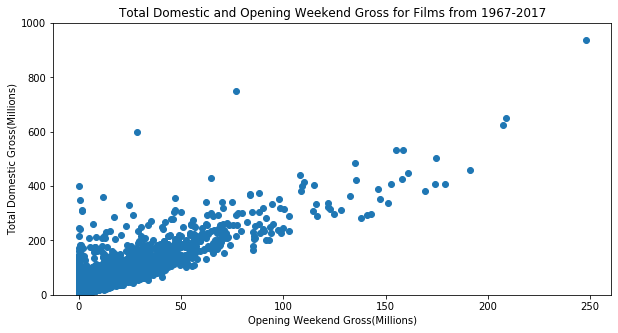

In [11]:
_ = plt.figure(figsize=(10,5))
_ = plt.scatter((boxoffice_df['Opening Weekend']/1000000),(boxoffice_df['Domestic Gross']/1000000))
_ = plt.ylim(0,1000)
_ = plt.xlabel('Opening Weekend Gross(Millions)')
_ = plt.ylabel('Total Domestic Gross(Millions)')
_ = plt.title('Total Domestic and Opening Weekend Gross for Films from 1967-2017')

From the graph, it can be concluded that there exists a correlation between opening weekend and final domestic gross. The data point to the extreme top left is Star Wars: The Force Awakens, a film with both the highest opening weekend and domestic gross. While most of the data seems to fit a linear line there do exist some outliers. The data point opening under 100 million and finishing just under 800 is James Cameron’s Avatar. Despite not being anywhere near the top opening weekend data points it was the former recorder holder for the highest domestic gross. To the right of Avatar is another James Cameron film, Titanic, another film that despite a modest opening weekend at around 30 million went on to make 600 million domestically, at the time of its release it too was the highest-grossing film of all time.

Listed below are the 10 Highest Grossing Films and 10 Highest Openings as of November 2017.

In [12]:
domestic_top10[['Title','Domestic Gross','Opening Weekend','Year']]

,Title,Domestic Gross,Opening Weekend,Year
26553,Star Wars: Episode VII - The Force Awakens,936662225.0,247966675.0,2015
14549,Avatar,749766139.0,77025481.0,2009
25082,Jurassic World,652270625.0,208806270.0,2015
17816,The Avengers,623357910.0,207438708.0,2012
1639,Titanic,600788188.0,28638131.0,1997
12479,The Dark Knight,533345358.0,158411483.0,2008
41487,Rogue One: A Star Wars Story,532177324.0,155081681.0,2016
42220,Beauty and the Beast,504014165.0,174750616.0,2017
38174,Finding Dory,486295561.0,135060273.0,2016
26556,Avengers: Age of Ultron,459005868.0,191271109.0,2015


In [13]:
opening_top10[['Title','Domestic Gross','Opening Weekend','Year']]

,Title,Domestic Gross,Opening Weekend,Year
26553,Star Wars: Episode VII - The Force Awakens,936662225.0,247966675.0,2015
25082,Jurassic World,652270625.0,208806270.0,2015
17816,The Avengers,623357910.0,207438708.0,2012
26556,Avengers: Age of Ultron,459005868.0,191271109.0,2015
26565,Captain America: Civil War,408084349.0,179139142.0,2016
42220,Beauty and the Beast,504014165.0,174750616.0,2017
20828,Iron Man 3,409013994.0,174144585.0,2013
17435,Harry Potter and the Deathly Hallows: Part 2,381011219.0,169189427.0,2011
18250,The Dark Knight Rises,448139099.0,160887295.0,2012
12479,The Dark Knight,533345358.0,158411483.0,2008


* note that Star Wars: The Last Jedi released in December of 2017 which opened at 220 million (second-highest opening weekend at the time of release) and finished at 620 million (5th in all-time domestic list) was not included due to the dataset containing films released until November 2017.

These lists show a recency bias of box office data, no film prior to 2011 is in the top 10 opening weekends and if you exclude the Titanic no film prior to 2008 is on the highest domestic grossing list either.

Let us now explore the box office data by seeing long term trends over 50 years using the get_year_average function defined at the bottom of the notebook, which takes the box office data and filters it into the respective year of release. We can now create a graph that shows the top domestic and opening weekend gross from 1967 to 2017. Similar to the graph above, I have divided the box office numbers by a million to make the data easier to read.

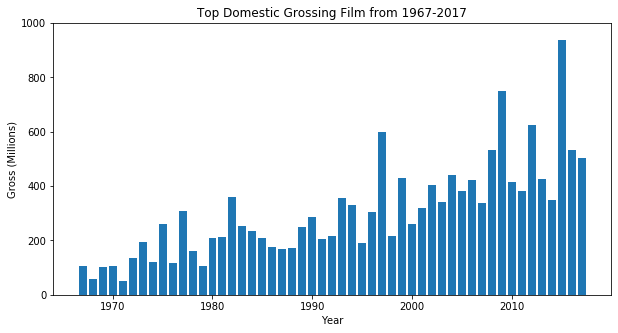

In [14]:
_ = plt.figure(figsize=(10,5))
_ = plt.bar(top_gross['Year'],top_gross['Domestic Gross'])
_ = plt.ylim(0,1000)
_ = plt.xlabel('Year')
_ = plt.ylabel('Gross (Millions)')
_ = plt.title('Top Domestic Grossing Film from 1967-2017')

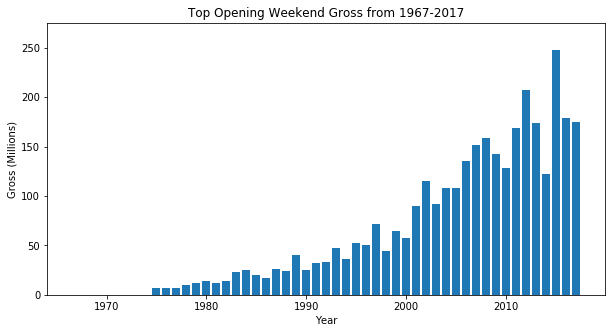

In [15]:
_ = plt.figure(figsize=(10,5))
_ = plt.bar(top_opening['Year'],top_opening['Opening Weekend'])
_ = plt.ylim(0,275)
_ = plt.xlabel('Year')
_ = plt.ylabel('Gross (Millions)')
_ = plt.title('Top Opening Weekend Gross from 1967-2017')

Examining the graphs above it is clear that selecting just the highest-grossing film and highest opening film in a year can yield some jarring results. 2014’s highest-grossing film is almost a third of 2015 when Star Wars: The Force Awakens released. But despite the gap in the highest grossing films if we inspect these two years further, they give us some valuable insights.

In [16]:
top_2014[['Title','Domestic Gross','Opening Weekend','Year']]

,Title,Domestic Gross,Opening Weekend,Year
24239,American Sniper,350126372.0,633456.0,2014
24871,The Hunger Games: Mockingjay - Part 1,337135885.0,121897634.0,2014
23751,Guardians of the Galaxy,333176600.0,94320883.0,2014
23051,Captain America: The Winter Soldier,259766572.0,95023721.0,2014
22716,The Lego Movie,257760692.0,69050279.0,2014
25388,The Hobbit: The Battle of the Five Armies,255119788.0,54724334.0,2014
23615,Transformers: Age of Extinction,245439076.0,100038390.0,2014
23435,Maleficent,241410378.0,69431298.0,2014
23357,X-Men: Days of Future Past,233921534.0,90823660.0,2014
24453,Big Hero 6,222527828.0,56215889.0,2014


In [17]:
top_2015[['Title','Domestic Gross','Opening Weekend','Year']]

,Title,Domestic Gross,Opening Weekend,Year
26553,Star Wars: Episode VII - The Force Awakens,936662225.0,247966675.0,2015
25082,Jurassic World,652270625.0,208806270.0,2015
26556,Avengers: Age of Ultron,459005868.0,191271109.0,2015
28828,Furious 7,353007020.0,147187040.0,2015
30049,The Martian,228433663.0,54308575.0,2015
28662,Cinderella,201151353.0,67877361.0,2015
23470,Mission: Impossible - Rogue Nation,195042377.0,55520089.0,2015
29797,Pitch Perfect 2,184296230.0,69216890.0,2015
26560,Ant-Man,180202163.0,57225526.0,2015
28793,Home,177397510.0,52107731.0,2015


In [18]:
print ('Mean Gross Top 25 Films 2014:',avg2014)
print('Mean Gross Top 25 Films 2015:',avg2015)

Mean Gross Top 25 Films 2014: 208587366.52
Mean Gross Top 25 Films 2015: 208799580.68


The top 25 grossing films of both 2014 and 2015 presents that the distribution of box office in a year can be very different from the next. While the top 4 films of 2015 all out grossed the highest grossing film of 2014, 13 films finish above 200 million in 2014 where 2015 had just 6. The 25th film on 2015’s list made nearly half of its 2014 counterpart. 2015 was a year where a handful of films excelled and made huge numbers, in fact, if Jurassic World came out any other year between 2010-2017, it would be the highest-grossing film of the year. But in 2014, although no single film attracted as a large crowd, overall had the same average gross when looking at the top 25 as 2015.

Instead of taking just the highest-grossing film of each year let’s take the mean of the top 5 films giving us an enhanced understanding of how much money the most successful films made and look at the trend over 50 years. We can do these by using the prior defined get_year_function at the bottom of the notebook and pass the number of films we want to take as 5 instead of 1.

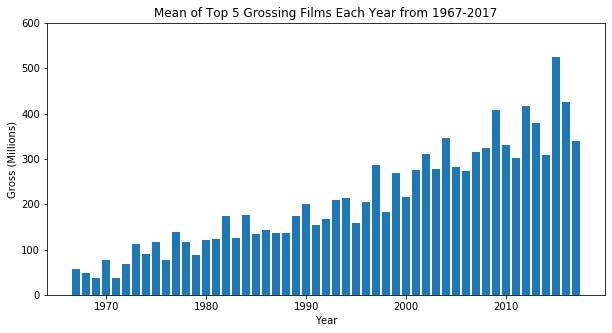

In [19]:
_ = plt.figure(figsize=(10,5))
_ = plt.bar(top5_gross['Year'],top5_gross['Domestic Gross'])
_ = plt.ylim(0,600)
_ = plt.xlabel('Year')
_ = plt.ylabel('Gross (Millions)')
_ = plt.title('Mean of Top 5 Grossing Films Each Year from 1967-2017')

This graph shows a better trend over the years showing that the box office gross has steadily grown over the last 5 decades, understandable as the price of admission has also increased as well. While some years are still significantly higher and lower than others, the overall box office is growing.

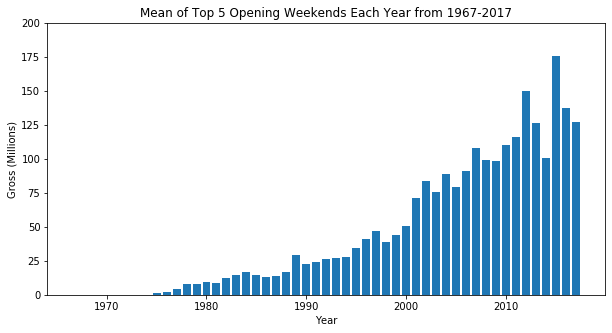

In [20]:
_ = plt.figure(figsize=(10,5))
_ = plt.bar(top5_opening['Year'],top5_opening['Opening Weekend'])
_ = plt.ylim(0,200)
_ = plt.xlabel('Year')
_ = plt.ylabel('Gross (Millions)')
_ = plt.title('Mean of Top 5 Opening Weekends Each Year from 1967-2017')

The graph above illustrates the trend in opening weekends for the top 5 films each year. Opening Weekend data was often not available earlier in the century as movies rarely opened nationwide during the same weekend. Hence the late 1960s and a majority of 1970s have little to no opening weekend data or data. The original Star Wars despite becoming the highest-grossing film of all-time grossing over 200 million in 1977, opened to only a 1.5 million due to releasing in only 40 theaters nationwide in May. It made over 7 million in August of that year when it expanded to over 1000 theaters. Today a majority of movies open well beyond 2000 theaters with event blockbusters opening above 4000 theaters in the first week of release. The graph below demonstrates the changing importance of opening weekend to a film’s overall domestic gross.

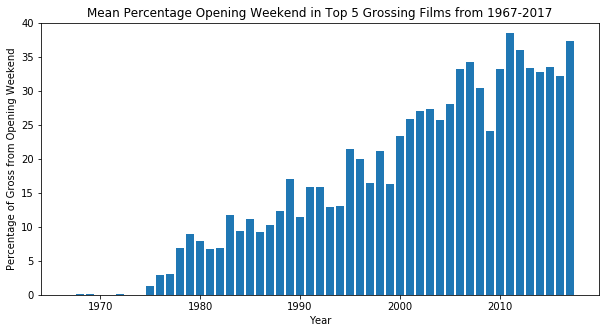

In [21]:
_ = plt.figure(figsize=(10,5))
_ = plt.bar(top5_gross['Year'],((top5_opening['Opening Weekend']) / (top5_gross['Domestic Gross'])* 100))
_ = plt.ylim(0,40)
_ = plt.xlabel('Year')
_ = plt.ylabel('Percentage of Gross from Opening Weekend')
_ = plt.title('Mean Percentage Opening Weekend in Top 5 Grossing Films from 1967-2017')

From the above graph just how much more a film’s gross since movies began opening across more theaters in the first week of release is evident. While throughout the 80s they accounted for 10-15% of the final gross numbers, in the 2010s they are responsible for anywhere from 30-40% of the domestic total. Another point to note is these are the top 5 movies of each year and so were relatively well-received, films that opened big and disappointed can see a far more significant percentage of their total coming from their opening weekend. 2016’s critically panned Batman V Superman: Dawn of Justice made half of its domestic total in its opening weekend.

To get a better sense of how much of the final domestic gross comes from the opening weekend in the graph below I have stacked them to give a better visual representation of how much the opening weekends have grown in the 50 years of data available.

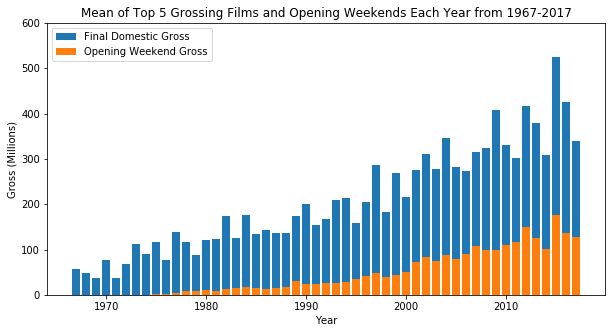

In [22]:
_ = plt.figure(figsize=(10,5))
_ = plt.bar(top5_gross['Year'],top5_gross['Domestic Gross'],label='Final Domestic Gross')
_ = plt.bar(top5_opening['Year'],top5_opening['Opening Weekend'],label='Opening Weekend Gross')
_ = plt.ylim(0,600)
_ = plt.xlabel('Year')
_ = plt.ylabel('Gross (Millions)')
_ = plt.title('Mean of Top 5 Grossing Films and Opening Weekends Each Year from 1967-2017')
_ = plt.legend()

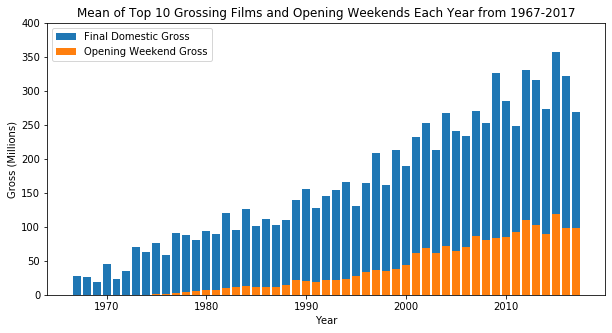

In [23]:
_ = plt.figure(figsize=(10,5))
_ = plt.bar(top10_gross['Year'],top10_gross['Domestic Gross'],label='Final Domestic Gross')
_ = plt.bar(top10_opening['Year'],top10_opening['Opening Weekend'],label='Opening Weekend Gross')
_ = plt.ylim(0,400)
_ = plt.xlabel('Year')
_ = plt.ylabel('Gross (Millions)')
_ = plt.title('Mean of Top 10 Grossing Films and Opening Weekends Each Year from 1967-2017')
_ = plt.legend()

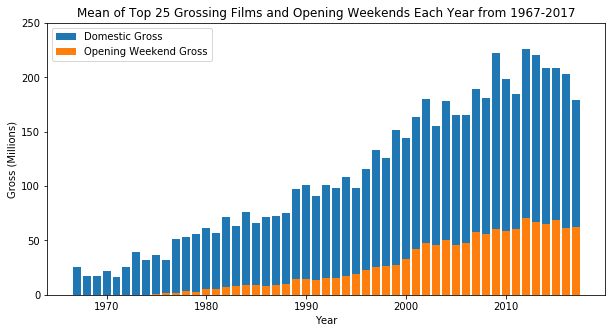

In [24]:
_ = plt.figure(figsize=(10,5))
_ = plt.bar(top25_gross['Year'],top25_gross['Domestic Gross'],label='Domestic Gross')
_ = plt.bar(top25_opening['Year'],top25_opening['Opening Weekend'],label='Opening Weekend Gross')
_ = plt.ylim(0,250)
_ = plt.xlabel('Year')
_ = plt.ylabel('Gross (Millions)')
_ = plt.title('Mean of Top 25 Grossing Films and Opening Weekends Each Year from 1967-2017')
_ = plt.legend()

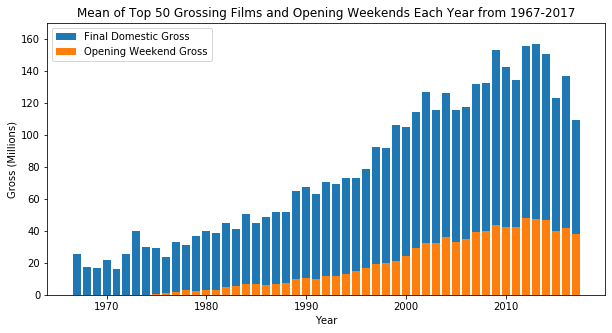

In [25]:
_ = plt.figure(figsize=(10,5))
_ = plt.bar(top50_gross['Year'],top50_gross['Domestic Gross'],label='Final Domestic Gross')
_ = plt.bar(top50_opening['Year'],top50_opening['Opening Weekend'],label='Opening Weekend Gross')
_ = plt.ylim(0,170)
_ = plt.xlabel('Year')
_ = plt.ylabel('Gross (Millions)')
_ = plt.title('Mean of Top 50 Grossing Films and Opening Weekends Each Year from 1967-2017')
_ = plt.legend()

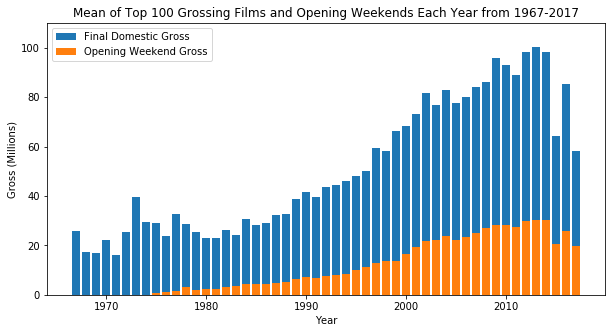

In [26]:
_ = plt.figure(figsize=(10,5))
_ = plt.bar(top100_gross['Year'],top100_gross['Domestic Gross'],label='Final Domestic Gross')
_ = plt.bar(top100_opening['Year'],top100_opening['Opening Weekend'],label='Opening Weekend Gross')
_ = plt.ylim(0,110)
_ = plt.xlabel('Year')
_ = plt.ylabel('Gross (Millions)')
_ = plt.title('Mean of Top 100 Grossing Films and Opening Weekends Each Year from 1967-2017')
_ = plt.legend()

Once expanding the number of film’s each year for our mean, we see a different trend than those originally presented by only taking the highest or the top 5 films of the year. Even with the opening weekends, which showed a clear trend upwards in the top 5 graphs show more of a plateau in recent years in the top 50 and 100 graphs. Looking at the top 5 suggested that 2015 was a significantly better year than 2014, we saw the mean of the top 25 from each year was nearly identical. Expanding the number of films to 100 shows that 2014 was a significantly better year and 2015. Using the top 5 as a metric 2015 had a higher mean than any year on record by over 100 million, using the top 100 indicates that it’s the lowest year since 1998.

So far we have considered only the raw box office data, using the average tickets prices in the graph shown below we can estimate the number of tickets sold for each film in the dataset and account for inflation and see a fairer comparison between films in past decades and the present.

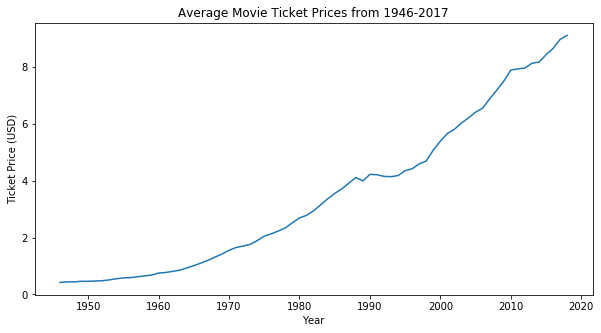

In [27]:
_ = plt.figure(figsize=(10,5))
_ = plt.plot(prices['Year'],prices['Average Ticket Price'])
_ = plt.xlabel('Year')
_ = plt.ylabel('Ticket Price (USD)')
_ = plt.title('Average Movie Ticket Prices from 1946-2017')

The following graphs display the tickets sold for the highest-grossing film of the year from 1967 to 2017 and mean of top 10 and 50. Due to many films prior to the 1980s not having 50 films for data the top 100 graph has been left out to avoid skewing the earlier data and to give a more accurate comparison.

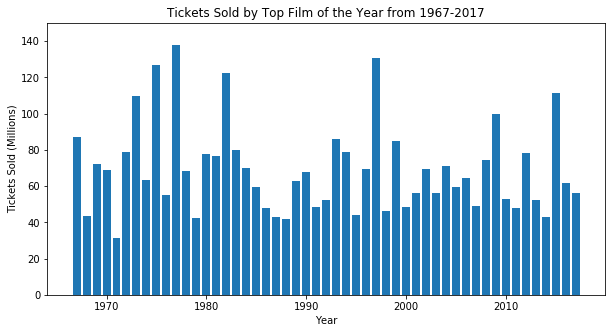

In [28]:
_ = plt.figure(figsize=(10,5))
_ = plt.bar(top_gross['Year'],top_gross['Tickets Sold'])
_ = plt.ylim(0,150)
_ = plt.xlabel('Year')
_ = plt.ylabel('Tickets Sold (Millions)')
_ = plt.title('Tickets Sold by Top Film of the Year from 1967-2017')

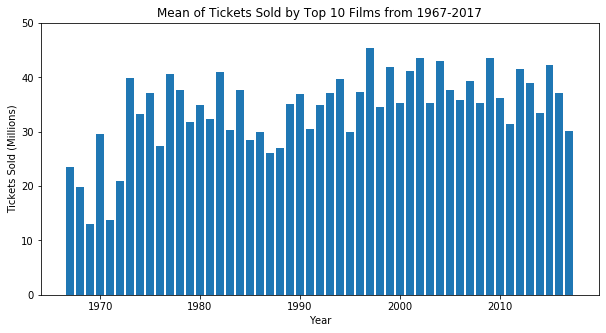

In [29]:
_ = plt.figure(figsize=(10,5))
_ = plt.bar(top10_gross['Year'],top10_gross['Tickets Sold'])
_ = plt.ylim(0,50)
_ = plt.xlabel('Year')
_ = plt.ylabel('Tickets Sold (Millions)')
_ = plt.title('Mean of Tickets Sold by Top 10 Films from 1967-2017')

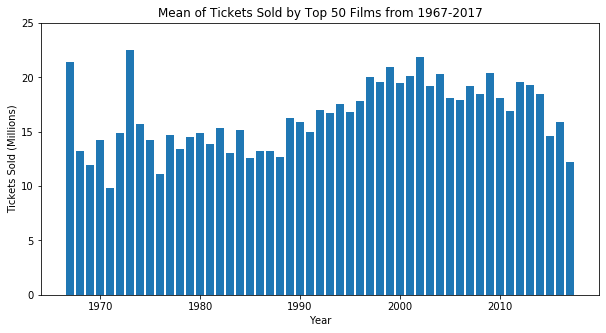

In [30]:
_ = plt.figure(figsize=(10,5))
_ = plt.bar(top50_gross['Year'],top50_gross['Tickets Sold'])
_ = plt.ylim(0,25)
_ = plt.xlabel('Year')
_ = plt.ylabel('Tickets Sold (Millions)')
_ = plt.title('Mean of Tickets Sold by Top 50 Films from 1967-2017')

Alongside the tickets sold data, which seems to be largely consistent looking at the top 50 films each year with only the last three years showing decline, perhaps due to the rising popularity of streaming films on sites such as Netflix and Amazon Prime. While streaming has been for in recent years seen as a threat to box office it seems to be greatly impacting the smaller to mid-budget films far more as opposed to the event blockbusters such as Star Wars or Marvel films. Tickets sold for the top 10 films are largely strong whereas the top 50 is showing a decline.

Ticket sales seem fairly steady between 15 to 20 million a year for the top 50 films another factor to take into account is the potential number of ticket purchasers for a movie, the population of the United States and Canada. The population of the United States has been increasing throughout the decades. Graphed below is the US population from 1946 to 2018.

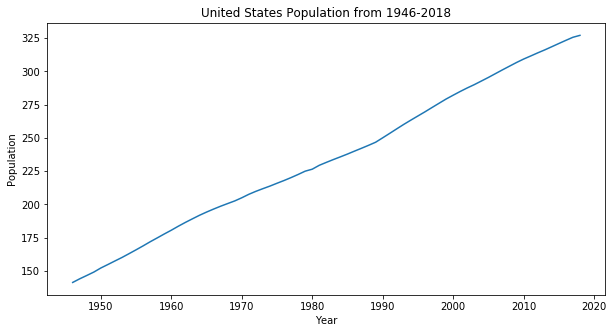

In [31]:
_ = plt.figure(figsize=(10,5))
_ = plt.plot(prices['Year'],prices['Population'])
_ = plt.xlabel('Year')
_ = plt.ylabel('Population')
_ = plt.title('United States Population from 1946-2018')

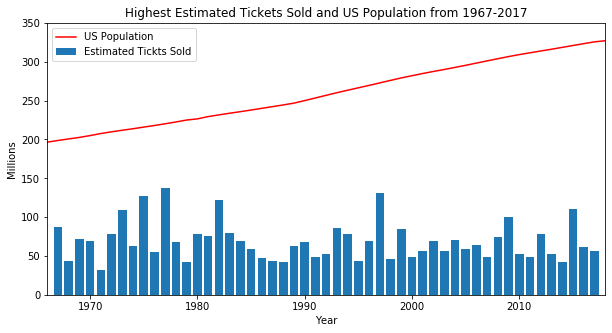

In [32]:
_ = plt.figure(figsize=(10,5))
_ = plt.plot(prices['Year'],prices['Population'],label='US Population',color='red')
_ = plt.bar(top_gross['Year'],top_gross['Tickets Sold'],label='Estimated Tickts Sold')
_ = plt.ylim(0,350)
_ = plt.xlim(1966,2018)
_ = plt.xlabel('Year')
_ = plt.ylabel('Millions')
_ = plt.title('Highest Estimated Tickets Sold and US Population from 1967-2017')
_ = plt.legend()

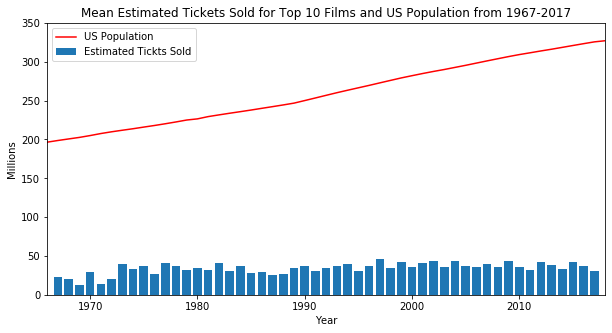

In [33]:
_ = plt.figure(figsize=(10,5))
_ = plt.plot(prices['Year'],prices['Population'],label='US Population',color='red')
_ = plt.bar(top10_gross['Year'],top10_gross['Tickets Sold'],label='Estimated Tickts Sold')
_ = plt.ylim(0,350)
_ = plt.xlim(1966,2018)
_ = plt.xlabel('Year')
_ = plt.ylabel('Millions')
_ = plt.title('Mean Estimated Tickets Sold for Top 10 Films and US Population from 1967-2017')
_ = plt.legend()

Combining the population and tickets sold data clarify that as the population in the US has risen from under 200 million to over 330 million in 2017 the number of tickets sold at the box office has remained largely constant. The overall the percentage of the population that goes to watch movies in theaters is today significantly lower than 50 years ago.

Finally, I wanted to use the tickets sold and the price for 2017 to adjust the box office data for inflation and see how both opening weekends and final domestic box office compare if all the years had the same ticket price.

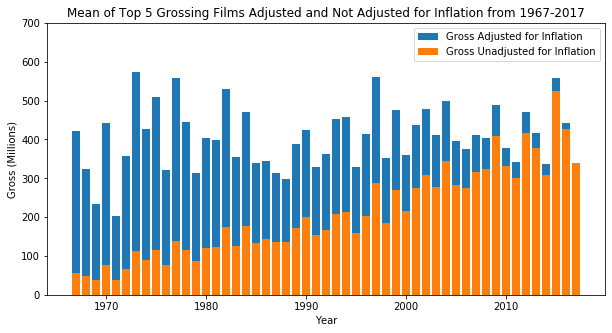

In [34]:
_ = plt.figure(figsize=(10,5))
_ = plt.bar(top5_gross['Year'],top5_gross['Adjusted Gross'],label= 'Gross Adjusted for Inflation')
_ = plt.bar(top5_gross['Year'],top5_gross['Domestic Gross'], label='Gross Unadjusted for Inflation')
_ = plt.ylim(0,700)
_ = plt.xlabel('Year')
_ = plt.ylabel('Gross (Millions)')
_ = plt.title('Mean of Top 5 Grossing Films Adjusted and Not Adjusted for Inflation from 1967-2017')
_ = plt.legend()

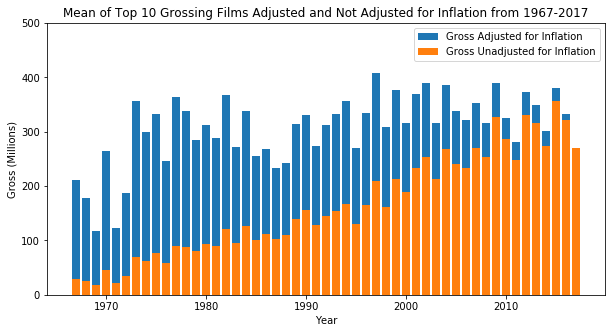

In [35]:
_ = plt.figure(figsize=(10,5))
_ = plt.bar(top10_gross['Year'],top10_gross['Adjusted Gross'],label= 'Gross Adjusted for Inflation')
_ = plt.bar(top10_gross['Year'],top10_gross['Domestic Gross'],label='Gross Unadjusted for Inflation')
_ = plt.ylim(0,500)
_ = plt.xlabel('Year')
_ = plt.ylabel('Gross (Millions)')
_ = plt.title('Mean of Top 10 Grossing Films Adjusted and Not Adjusted for Inflation from 1967-2017')
_ = plt.legend()

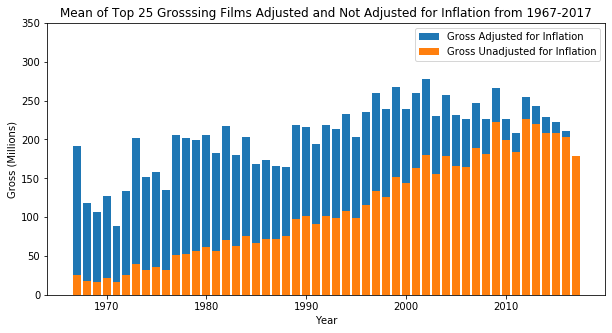

In [36]:
_ = plt.figure(figsize=(10,5))
_ = plt.bar(top25_gross['Year'],top25_gross['Adjusted Gross'],label='Gross Adjusted for Inflation')
_ = plt.bar(top25_gross['Year'],top25_gross['Domestic Gross'],label='Gross Unadjusted for Inflation')
_ = plt.ylim(0,350)
_ = plt.xlabel('Year')
_ = plt.ylabel('Gross (Millions)')
_ = plt.title('Mean of Top 25 Grosssing Films Adjusted and Not Adjusted for Inflation from 1967-2017')
_ = plt.legend()

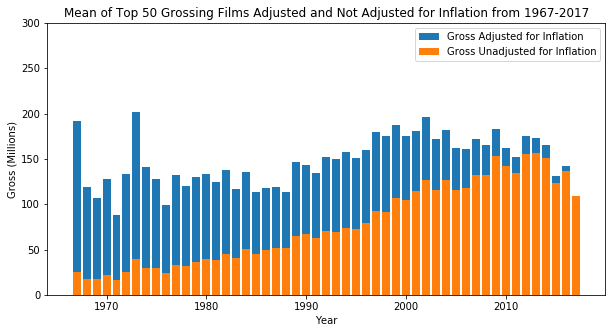

In [37]:
_ = plt.figure(figsize=(10,5))
_ = plt.bar(top50_gross['Year'],top50_gross['Adjusted Gross'],label='Gross Adjusted for Inflation')
_ = plt.bar(top50_gross['Year'],top50_gross['Domestic Gross'],label='Gross Unadjusted for Inflation')
_ = plt.ylim(0,300)
_ = plt.xlabel('Year')
_ = plt.ylabel('Gross (Millions)')
_ = plt.title('Mean of Top 50 Grossing Films Adjusted and Not Adjusted for Inflation from 1967-2017')
_ = plt.legend()

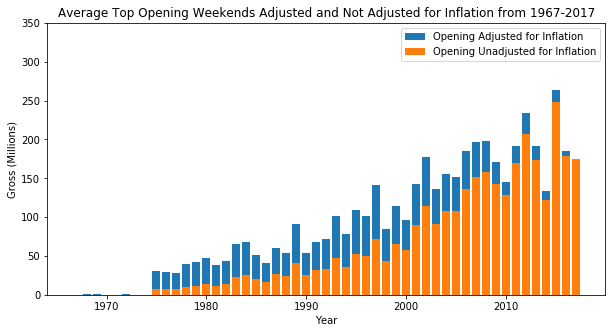

In [38]:
_ = plt.figure(figsize=(10,5))
_ = plt.bar(top_opening['Year'],top_opening['Adjusted Gross'], label='Opening Adjusted for Inflation')
_ = plt.bar(top_opening['Year'],top_opening['Opening Weekend'],label='Opening Unadjusted for Inflation')
_ = plt.ylim(0,350)
_ = plt.xlabel('Year')
_ = plt.ylabel('Gross (Millions)')
_ = plt.title('Average Top Opening Weekends Adjusted and Not Adjusted for Inflation from 1967-2017')
_ = plt.legend()

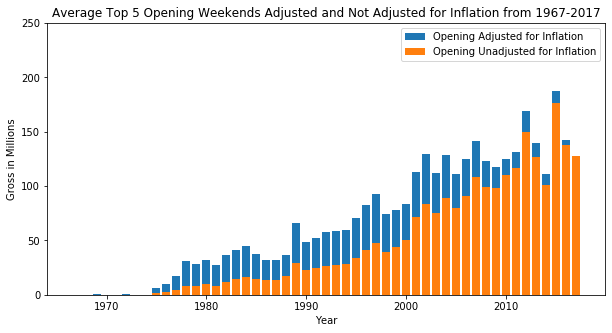

In [39]:
_ = plt.figure(figsize=(10,5))
_ = plt.bar(top5_gross['Year'],top5_opening['Adjusted Gross'],label='Opening Adjusted for Inflation')
_ = plt.bar(top5_opening['Year'],top5_opening['Opening Weekend'],label='Opening Unadjusted for Inflation')
_ = plt.ylim(0,250)
_ = plt.xlabel('Year')
_ = plt.ylabel('Gross in Millions')
_ = plt.title('Average Top 5 Opening Weekends Adjusted and Not Adjusted for Inflation from 1967-2017')
_ = plt.legend()

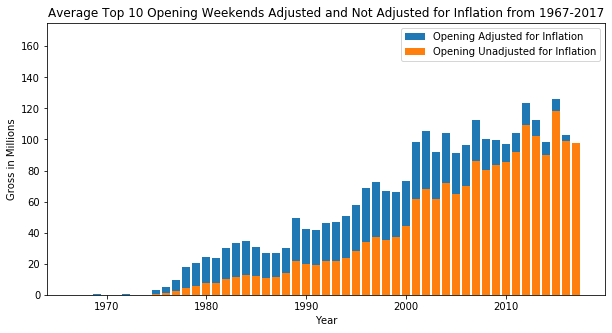

In [40]:
_ = plt.figure(figsize=(10,5))
_ = plt.bar(top10_gross['Year'],top10_opening['Adjusted Gross'],label='Opening Adjusted for Inflation')
_ = plt.bar(top10_opening['Year'],top10_opening['Opening Weekend'],label='Opening Unadjusted for Inflation')
_ = plt.ylim(0,175)
_ = plt.xlabel('Year')
_ = plt.ylabel('Gross in Millions')
_ = plt.title('Average Top 10 Opening Weekends Adjusted and Not Adjusted for Inflation from 1967-2017')
_ = plt.legend()

In conclusion, taking the adjusted for inflation data into account we can state that opening weekend grosses have in the past 50 years increased substantially and rapidly with the changing release pattern for films, as well as audience turning out earlier for highly anticipated films. Unlike the opening weekend though such clear conclusions for the final domestic box office cannot be made. While in recent years big event films have had massive crowd turnouts, the low to medium budgets films have seen a decline as evident by averaging the top 50 and 100 films of the year. Whilst ticket sales staying consistent over 50 years with new competitors, such as home video releases (VHS, LaserDisc, DVD, Blu-rays) starting from the early 80s to the present alongside the growing popularity of streaming platforms in recent years is an impressive accomplishment, it must be noted that despite the considerable rise in population in the United States the percentage of people going to theaters has seen an overall decrease over this time period.

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
movies = pd.read_csv('movies_dataset.csv',index_col=[0])
prices = pd.read_csv('historical_ticket_price.csv')

In [3]:
boxoffice_df = movies
boxoffice_df = boxoffice_df[boxoffice_df['Domestic Gross'].notnull()]
boxoffice_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12047 entries, 0 to 45373
Data columns (total 21 columns):
imdbID                   10793 non-null object
Title                    12047 non-null object
Year                     12047 non-null object
Rated                    11534 non-null object
Budget                   2972 non-null float64
Domestic Gross           12047 non-null float64
Opening Weekend          11022 non-null float64
imdbRating               12046 non-null float64
imdbVotes                12045 non-null float64
Rotten Tomatoes Score    11248 non-null float64
Metascore                8974 non-null float64
Genre                    12045 non-null object
Runtime                  12044 non-null float64
Director                 12042 non-null object
Actors                   11992 non-null object
Awards                   9804 non-null object
vote_average             11884 non-null float64
vote_count               11884 non-null float64
belongs_to_collection    1519 non-null

In [4]:
def get_year_average(dataframe,column_name,start_year:int,end_year:int,num_films:int):
    yearList = []
    avgList = []
    ticketList = []
    adjustedList = []
    populationList = []
    for i in range(start_year,end_year + 1):
        topi = dataframe[dataframe['Year'] == str(i)].sort_values(column_name,ascending=False).head(num_films)
        avg = topi[column_name].mean()
        yearList.append(i)
        avgList.append(avg/1000000)
        tickets = prices[prices['Year'] == i]
        ticket_price = tickets['Average Ticket Price'][i - 1946]
        tickets_sold = avg/ticket_price
        ticketList.append(tickets_sold/1000000)
        price2017 = prices['Average Ticket Price'][71]
        adjustedList.append((tickets_sold * price2017)/1000000)

    data = {'Year': yearList, column_name: avgList,'Tickets Sold':ticketList,'Adjusted Gross':adjustedList}
    df = pd.DataFrame.from_dict(data)
    return df

In [5]:
top_gross = get_year_average(boxoffice_df,'Domestic Gross',1967,2017,1)
top_opening = get_year_average(boxoffice_df,'Opening Weekend',1967,2017,1)
top5_gross = get_year_average(boxoffice_df,'Domestic Gross',1967,2017,5)
top5_opening = get_year_average(boxoffice_df,'Opening Weekend',1967,2017,5)
top10_gross = get_year_average(boxoffice_df,'Domestic Gross',1967,2017,10)
top10_opening = get_year_average(boxoffice_df,'Opening Weekend',1967,2017,10)
top25_gross = get_year_average(boxoffice_df,'Domestic Gross',1967,2017,25)
top25_opening = get_year_average(boxoffice_df,'Opening Weekend',1967,2017,25)
top50_gross = get_year_average(boxoffice_df,'Domestic Gross',1967,2017,50)
top50_opening = get_year_average(boxoffice_df,'Opening Weekend',1967,2017,50)
top100_gross = get_year_average(boxoffice_df,'Domestic Gross',1967,2017,100)
top100_opening = get_year_average(boxoffice_df,'Opening Weekend',1967,2017,100)

In [6]:
domestic_top10 = boxoffice_df.sort_values('Domestic Gross',ascending=False).head(10)
opening_top10 =  boxoffice_df.sort_values('Opening Weekend',ascending=False).head(10)

In [7]:
top_2015 = boxoffice_df[boxoffice_df['Year'] == '2015'].sort_values('Domestic Gross',ascending=False).head(25)
top_2014 = boxoffice_df[boxoffice_df['Year'] == '2014'].sort_values('Domestic Gross',ascending=False).head(25)
avg2014 = top_2014['Domestic Gross'].mean()
avg2015 = top_2015['Domestic Gross'].mean()

In [8]:
boxoffice_df.describe()

,Budget,Domestic Gross,Opening Weekend,imdbRating,imdbVotes,Rotten Tomatoes Score,Metascore,Runtime,vote_average,vote_count
count,2.972000e+03,1.204700e+04,1.102200e+04,12046.000000,1.204500e+04,11248.000000,8974.000000,12044.000000,11884.000000,11884.000000
mean,4.439488e+07,2.155059e+07,5.629878e+06,6.451337,5.058787e+04,59.125445,57.346891,104.818001,5.834239,187.550067
std,4.494077e+07,4.719193e+07,1.376996e+07,0.984722,1.224700e+05,27.648677,17.593263,21.546312,1.628050,630.690179
min,2.200000e+02,3.000000e+01,2.000000e+01,1.500000,1.700000e+01,0.000000,1.000000,4.000000,0.000000,0.000000
25%,1.300000e+07,1.394235e+05,1.714725e+04,5.900000,2.523000e+03,37.000000,45.000000,92.000000,5.300000,6.000000
50%,3.000000e+07,2.479538e+06,1.940740e+05,6.500000,9.456000e+03,64.000000,59.000000,101.000000,6.100000,19.000000
75%,6.000000e+07,2.180542e+07,5.520745e+06,7.200000,4.182100e+04,83.000000,71.000000,113.000000,6.800000,94.000000
max,3.000000e+08,9.366622e+08,2.479667e+08,9.300000,2.154564e+06,100.000000,100.000000,566.000000,10.000000,12114.000000
